In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# ------- 1. KNN: Tính khoảng cách và dự đoán -------
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, x_test, k, task='classification'):
    distances = [euclidean(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]

    if task == 'classification':
        most_common = Counter(k_labels).most_common(1)[0][0]
        return most_common
    elif task == 'regression':
        return np.mean(k_labels)

In [13]:
# ------- 2. Đọc và xử lý dữ liệu từ iris.csv -------
df = pd.read_csv('iris.csv')

# Đổi tên cột 'species' thành 'class' (cho dễ dùng)
df = df.rename(columns={'species': 'class'})

# Mã hóa nhãn: setosa → 0, versicolor → 1, virginica → 2
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['class'] = df['class'].map(label_map)


In [ ]:
# ------- 3. KNN PHÂN LOẠI: Dự đoán loài hoa -------
X_cls = df.iloc[:, :4].values  # 4 đặc trưng
y_cls = df['class'].values     # nhãn số

# Chia tập huấn luyện và kiểm tra
np.random.seed(42)
indices = np.random.permutation(len(X_cls))
train_size = int(0.8 * len(X_cls))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train_cls, X_test_cls = X_cls[train_idx], X_cls[test_idx]
y_train_cls, y_test_cls = y_cls[train_idx], y_cls[test_idx]

# Dự đoán
k = 5
y_pred_cls = np.array([knn_predict(X_train_cls, y_train_cls, x, k, task='classification') for x in X_test_cls])
acc = np.mean(y_pred_cls == y_test_cls)
print(f"[KNN PHÂN LOẠI] Độ chính xác: {acc * 100:.2f}%")

In [16]:

# ------- 4. KNN HỒI QUY: Dự đoán petal_width từ petal_length -------
X_reg = df[['petal_length']].values  # đầu vào: chiều dài cánh hoa
y_reg = df['petal_width'].values     # đầu ra: chiều rộng cánh hoa

X_train_reg, X_test_reg = X_reg[train_idx], X_reg[test_idx]
y_train_reg, y_test_reg = y_reg[train_idx], y_reg[test_idx]

y_pred_reg = np.array([knn_predict(X_train_reg, y_train_reg, x, k, task='regression') for x in X_test_reg])
rmse = np.sqrt(np.mean((y_pred_reg - y_test_reg) ** 2))
print(f"[KNN HỒI QUY] RMSE: {rmse:.4f}")


[KNN HỒI QUY] RMSE: 0.2257


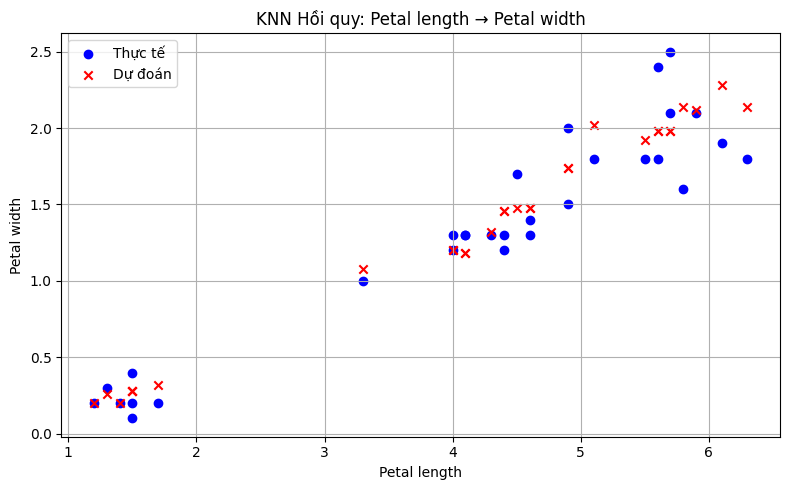

In [15]:
# ------- 5. Trực quan hóa kết quả hồi quy -------
plt.figure(figsize=(8,5))
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Thực tế')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='Dự đoán', marker='x')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('KNN Hồi quy: Petal length → Petal width')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()